<a href="https://colab.research.google.com/github/lucasyeh01/2025_11_06HW/blob/main/%E4%BD%9C%E6%A5%AD5_LLM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -U transformers accelerate peft datasets

Using device: cpu


Map:   0%|          | 0/16000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'emotion_label', 'risk_label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label', 'emotion_label', 'risk_label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label', 'emotion_label', 'risk_label'],
        num_rows: 2000
    })
})
Train example: {'text': 'i didnt feel humiliated', 'label': 0, 'emotion_label': 'sadness', 'risk_label': 2}


Device set to use cpu



Running Zero-shot inference...

=== Zero-shot (Emotion) - Classification Report ===
              precision    recall  f1-score   support

     sadness     0.7805    0.7273    0.7529        88
         joy     0.8824    0.6148    0.7246       122
        love     0.4348    0.4762    0.4545        21
       anger     0.6098    0.8333    0.7042        30
        fear     0.5676    0.7241    0.6364        29
    surprise     0.3125    1.0000    0.4762        10

    accuracy                         0.6833       300
   macro avg     0.5979    0.7293    0.6248       300
weighted avg     0.7445    0.6833    0.6952       300



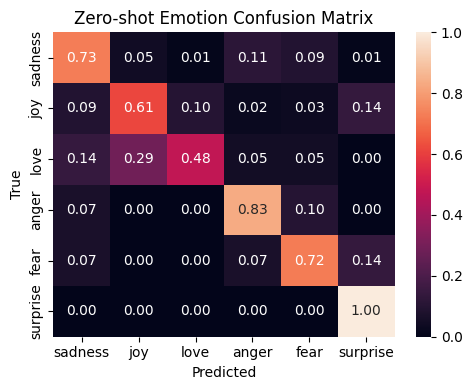


=== Zero-shot (Risk) - Classification Report ===
              precision    recall  f1-score   support

    low_risk     0.9286    0.8497    0.8874       153
    mid_risk     0.6538    0.8644    0.7445        59
   high_risk     0.7805    0.7273    0.7529        88

    accuracy                         0.8167       300
   macro avg     0.7876    0.8138    0.7949       300
weighted avg     0.8311    0.8167    0.8198       300



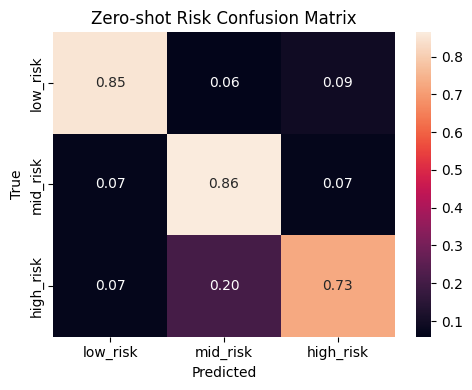


Running Few-shot inference...

=== Few-shot (Emotion) - Classification Report ===
              precision    recall  f1-score   support

     sadness     0.7255    0.8409    0.7789        88
         joy     0.8778    0.6475    0.7453       122
        love     0.5385    0.3333    0.4118        21
       anger     0.5581    0.8000    0.6575        30
        fear     0.7778    0.4828    0.5957        29
    surprise     0.2941    1.0000    0.4545        10

    accuracy                         0.6933       300
   macro avg     0.6286    0.6841    0.6073       300
weighted avg     0.7483    0.6933    0.6989       300



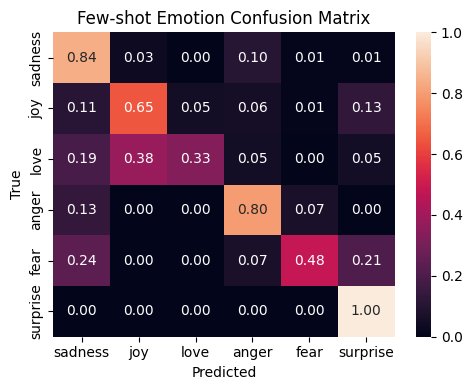


=== Few-shot (Risk) - Classification Report ===
              precision    recall  f1-score   support

    low_risk     0.9270    0.8301    0.8759       153
    mid_risk     0.6885    0.7119    0.7000        59
   high_risk     0.7255    0.8409    0.7789        88

    accuracy                         0.8100       300
   macro avg     0.7803    0.7943    0.7849       300
weighted avg     0.8210    0.8100    0.8128       300



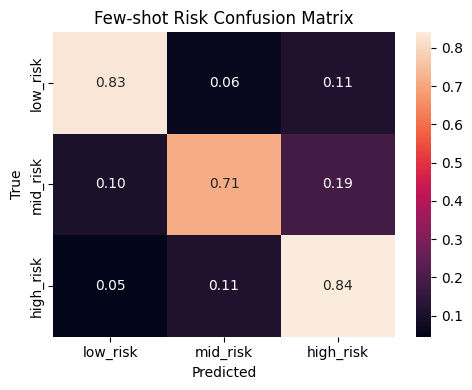

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


trainable params: 742,662 || all params: 67,700,748 || trainable%: 1.0970


Map:   0%|          | 0/8000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

Using the `WANDB_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).
/tmp/ipython-input-1212536554.py:322: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(



Start LoRA training...


/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:666: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Step,Training Loss
50,1.535500
100,1.212900
150,0.878200
200,0.748800
250,0.726600
300,0.635200
350,0.594300
400,0.577800
450,0.537700
500,0.527400



Evaluating LoRA model on test set...


/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:666: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)



=== LoRA (Emotion) - Classification Report ===
              precision    recall  f1-score   support

     sadness     0.8236    0.8761    0.8490       581
         joy     0.8788    0.9079    0.8931       695
        love     0.6978    0.6101    0.6510       159
       anger     0.8000    0.7127    0.7538       275
        fear     0.7642    0.8393    0.8000       224
    surprise     0.8235    0.4242    0.5600        66

    accuracy                         0.8245      2000
   macro avg     0.7980    0.7284    0.7512      2000
weighted avg     0.8229    0.8245    0.8205      2000



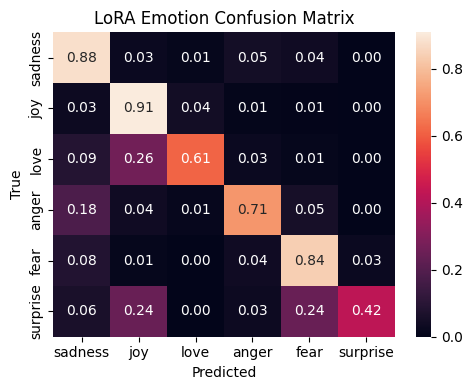


=== LoRA (Risk) - Classification Report ===
              precision    recall  f1-score   support

    low_risk     0.9484    0.9185    0.9332       920
    mid_risk     0.8289    0.8156    0.8222       499
   high_risk     0.8236    0.8761    0.8490       581

    accuracy                         0.8805      2000
   macro avg     0.8670    0.8701    0.8681      2000
weighted avg     0.8823    0.8805    0.8811      2000



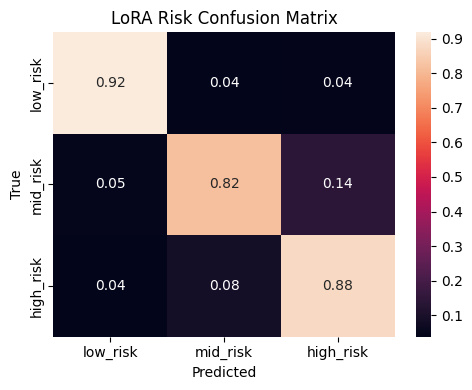


LoRA (Risk) AUROC (macro): 0.9690545565023033
LoRA (Risk) PR-AUC (macro): 0.934745979859767


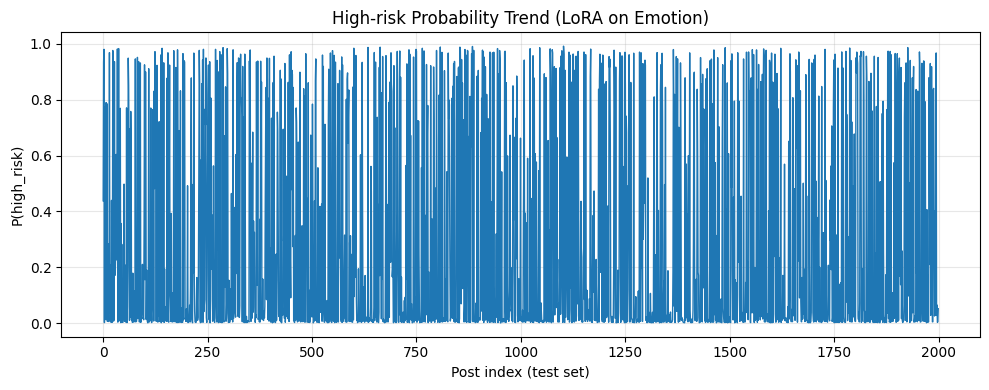

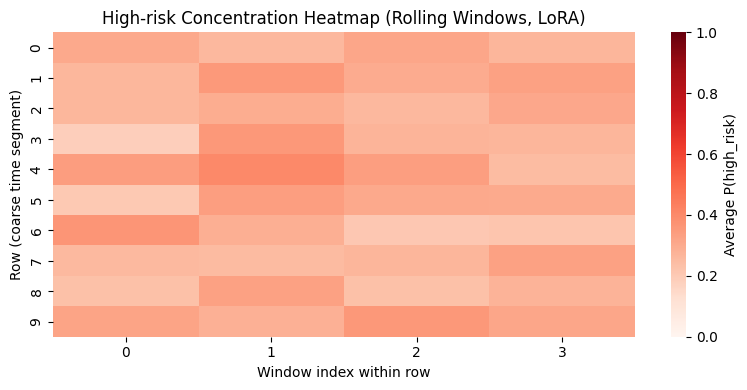


=== 完成：
1. Emotion dataset 載入 + Emotion→Risk 映射
2. Zero-shot / Few-shot / LoRA 三種方法
3. 情緒與風險分類、評估指標（LoRA 含 F1 / AUROC / PR-AUC / Confusion Matrix）
4. 高風險走勢圖 + Rolling 熱圖


In [6]:
# =========================
# HW9：LLM 微調 — 情緒分類與憂鬱症風險監測
# Colab 版主程式（相容舊版 transformers 版）
# =========================

import os
os.environ["WANDB_DISABLED"] = "true"

# ---------- 0. 安裝套件 ----------
!pip -q install datasets transformers accelerate peft scikit-learn evaluate matplotlib seaborn

# ---------- 1. Import 與基本設定 ----------
import random, os, numpy as np, matplotlib.pyplot as plt, seaborn as sns
from typing import List, Tuple

import torch
from datasets import load_dataset
from sklearn.metrics import (
    classification_report,
    f1_score,
    confusion_matrix,
    roc_auc_score,
    average_precision_score
)
from sklearn.preprocessing import label_binarize

from transformers import (
    AutoTokenizer,
    AutoModelForSeq2SeqLM,
    AutoModelForSequenceClassification,
    Text2TextGenerationPipeline,
    Trainer,
    TrainingArguments,
    DataCollatorWithPadding,
)
from peft import LoraConfig, get_peft_model

SEED = 42
random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(SEED)

device = "cuda" if torch.cuda.is_available() else "cpu"
print("Using device:", device)

# ---------- 2. 載入 Emotion Dataset + Emotion→Risk 映射 ----------
"""
Dataset: dair-ai/emotion
labels: joy / love / surprise / anger / fear / sadness

Risk mapping:
joy/love/surprise → 0 = low_risk
anger/fear        → 1 = mid_risk
sadness           → 2 = high_risk
"""

raw_datasets = load_dataset("dair-ai/emotion")

emotion_id2label = {
    0: "sadness",
    1: "joy",
    2: "love",
    3: "anger",
    4: "fear",
    5: "surprise",
}
emotion_label2id = {v: k for k, v in emotion_id2label.items()}

risk_label2id = {"low_risk": 0, "mid_risk": 1, "high_risk": 2}
risk_id2label = {v: k for k, v in risk_label2id.items()}

def emotion_to_risk(emotion_label: str) -> int:
    if emotion_label in ["joy", "love", "surprise"]:
        return 0  # low_risk
    elif emotion_label in ["anger", "fear"]:
        return 1  # mid_risk
    else:  # sadness
        return 2  # high_risk

def add_labels(example):
    emo_label = emotion_id2label[example["label"]]
    risk = emotion_to_risk(emo_label)
    example["emotion_label"] = emo_label
    example["risk_label"] = risk
    return example

datasets = raw_datasets.map(add_labels)

print(datasets)
print("Train example:", datasets["train"][0])

# ---------- 3. 共用：評估 & 視覺化工具 ----------

def plot_confusion(y_true, y_pred, labels, title="Confusion Matrix"):
    cm = confusion_matrix(y_true, y_pred, labels=list(range(len(labels))))
    cm_norm = cm / cm.sum(axis=1, keepdims=True)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm_norm, annot=True, fmt=".2f",
                xticklabels=labels, yticklabels=labels)
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title(title)
    plt.tight_layout()
    plt.show()
    return cm

def compute_auc_pr(y_true, y_proba, num_classes: int):
    """
    y_true: shape (N,) int labels 0..C-1
    y_proba: shape (N, C) predicted probabilities
    回傳 macro AUROC, macro PR-AUC
    """
    y_true_bin = label_binarize(y_true, classes=list(range(num_classes)))
    auc_macro = roc_auc_score(y_true_bin, y_proba, average="macro", multi_class="ovr")
    pr_macro = average_precision_score(y_true_bin, y_proba, average="macro")
    return auc_macro, pr_macro

def show_basic_metrics(method_name: str, y_true, y_pred, label_names: List[str]):
    print(f"\n=== {method_name} - Classification Report ===")
    print(classification_report(
        y_true, y_pred, target_names=label_names, digits=4
    ))

# ---------- 4. Zero-shot：FLAN-T5 (Emotion → Risk) ----------

zs_model_name = "google/flan-t5-base"
zs_tokenizer = AutoTokenizer.from_pretrained(zs_model_name)
zs_model = AutoModelForSeq2SeqLM.from_pretrained(zs_model_name).to(device)

zs_pipeline = Text2TextGenerationPipeline(
    model=zs_model,
    tokenizer=zs_tokenizer,
    device=0 if device == "cuda" else -1
)

candidate_emotions = ["joy", "love", "surprise", "anger", "fear", "sadness"]

def parse_emotion_from_output(text: str) -> str:
    t = text.strip().lower()
    for emo in candidate_emotions:
        if emo in t:
            return emo
    t_first = t.replace(".", " ").replace(",", " ").split()[0]
    if t_first in candidate_emotions:
        return t_first
    return "joy"

def zero_shot_predict(texts: List[str]) -> Tuple[List[int], List[int]]:
    emo_preds = []
    risk_preds = []
    for txt in texts:
        prompt = (
            "Classify the emotion of the following social media post into one of "
            "[joy, love, surprise, anger, fear, sadness]. "
            "Only output the emotion label.\n\n"
            f"Post: {txt}\nEmotion:"
        )
        out = zs_pipeline(prompt, max_new_tokens=5)[0]["generated_text"]
        emo_label = parse_emotion_from_output(out)
        emo_preds.append(emotion_label2id[emo_label])
        risk_preds.append(emotion_to_risk(emo_label))
    return emo_preds, risk_preds

max_zs_samples = 300
test_ds = datasets["test"].shuffle(seed=SEED).select(range(max_zs_samples))

zs_texts = test_ds["text"]
zs_true_emotion = test_ds["label"]
zs_true_risk = test_ds["risk_label"]

print("\nRunning Zero-shot inference...")
zs_pred_emotion, zs_pred_risk = zero_shot_predict(zs_texts)

show_basic_metrics("Zero-shot (Emotion)", zs_true_emotion, zs_pred_emotion,
                   [emotion_id2label[i] for i in range(6)])
plot_confusion(zs_true_emotion, zs_pred_emotion,
               [emotion_id2label[i] for i in range(6)],
               title="Zero-shot Emotion Confusion Matrix")

show_basic_metrics("Zero-shot (Risk)", zs_true_risk, zs_pred_risk,
                   [risk_id2label[i] for i in range(3)])
plot_confusion(zs_true_risk, zs_pred_risk,
               [risk_id2label[i] for i in range(3)],
               title="Zero-shot Risk Confusion Matrix")

# ---------- 5. Few-shot：FLAN-T5 + 5 個示範 ----------

k_shot = 5
train_small = datasets["train"].shuffle(seed=SEED).select(range(2000))
few_shot_examples = train_small.shuffle(seed=SEED).select(range(k_shot))

def build_few_shot_prompt(post_text: str) -> str:
    examples_str = ""
    for ex in few_shot_examples:
        examples_str += (
            f"Post: {ex['text']}\n"
            f"Emotion: {ex['emotion_label']}\n\n"
        )
    prompt = (
        "You are an emotion classification model. "
        "Given a social media post, classify its emotion into one of "
        "[joy, love, surprise, anger, fear, sadness].\n\n"
        "Here are some examples:\n\n"
        f"{examples_str}"
        "Now classify the following post:\n"
        f"Post: {post_text}\nEmotion:"
    )
    return prompt

def few_shot_predict(texts: List[str]) -> Tuple[List[int], List[int]]:
    emo_preds = []
    risk_preds = []
    for txt in texts:
        prompt = build_few_shot_prompt(txt)
        out = zs_pipeline(prompt, max_new_tokens=5)[0]["generated_text"]
        emo_label = parse_emotion_from_output(out)
        emo_preds.append(emotion_label2id[emo_label])
        risk_preds.append(emotion_to_risk(emo_label))
    return emo_preds, risk_preds

max_fs_samples = 300
fs_ds = datasets["test"].shuffle(seed=SEED).select(range(max_fs_samples))
fs_texts = fs_ds["text"]
fs_true_emotion = fs_ds["label"]
fs_true_risk = fs_ds["risk_label"]

print("\nRunning Few-shot inference...")
fs_pred_emotion, fs_pred_risk = few_shot_predict(fs_texts)

show_basic_metrics("Few-shot (Emotion)", fs_true_emotion, fs_pred_emotion,
                   [emotion_id2label[i] for i in range(6)])
plot_confusion(fs_true_emotion, fs_pred_emotion,
               [emotion_id2label[i] for i in range(6)],
               title="Few-shot Emotion Confusion Matrix")

show_basic_metrics("Few-shot (Risk)", fs_true_risk, fs_pred_risk,
                   [risk_id2label[i] for i in range(3)])
plot_confusion(fs_true_risk, fs_pred_risk,
               [risk_id2label[i] for i in range(3)],
               title="Few-shot Risk Confusion Matrix")

# ---------- 6. LoRA 微調：DistilBERT for Emotion Classification ----------

lora_base_model_name = "distilbert-base-uncased"
lora_tokenizer = AutoTokenizer.from_pretrained(lora_base_model_name)

num_emotion_labels = 6

base_model = AutoModelForSequenceClassification.from_pretrained(
    lora_base_model_name,
    num_labels=num_emotion_labels,
    id2label=emotion_id2label,
    label2id=emotion_label2id,
)
base_model.to(device)

lora_config = LoraConfig(
    r=8,
    lora_alpha=16,
    target_modules=["q_lin", "v_lin"],  # DistilBERT attention 的線性層名稱
    lora_dropout=0.1,
    bias="none",
    task_type="SEQ_CLS",
)

lora_model = get_peft_model(base_model, lora_config)
lora_model.print_trainable_parameters()

max_length = 128

def tokenize_function(example):
    return lora_tokenizer(
        example["text"],
        truncation=True,
        max_length=max_length,
    )

max_train_samples = 8000
max_eval_samples = 2000

train_for_lora = datasets["train"]
val_for_lora = datasets["validation"]
test_for_lora = datasets["test"]

train_for_lora = train_for_lora.shuffle(seed=SEED).select(
    range(min(max_train_samples, len(train_for_lora)))
)
val_for_lora = val_for_lora.shuffle(seed=SEED).select(
    range(min(max_eval_samples, len(val_for_lora)))
)

tokenized_train = train_for_lora.map(tokenize_function, batched=True)
tokenized_val = val_for_lora.map(tokenize_function, batched=True)
tokenized_test = test_for_lora.map(tokenize_function, batched=True)

data_collator = DataCollatorWithPadding(tokenizer=lora_tokenizer)

# 🔴 這裡是「相容舊版」的 TrainingArguments：不含 evaluation_strategy 等
training_args = TrainingArguments(
    output_dir="./lora-emotion-checkpoints",
    learning_rate=2e-4,
    per_device_train_batch_size=32,
    per_device_eval_batch_size=64,
    num_train_epochs=2,
    weight_decay=0.01,
    logging_steps=50,
    fp16=False if device == "cpu" else True,
)

def compute_metrics_trainer(p):
    preds = np.argmax(p.predictions, axis=1)
    labels = p.label_ids
    f1_macro = f1_score(labels, preds, average="macro")
    f1_weighted = f1_score(labels, preds, average="weighted")
    return {
        "f1_macro": f1_macro,
        "f1_weighted": f1_weighted,
    }

trainer = Trainer(
    model=lora_model,
    args=training_args,
    train_dataset=tokenized_train,
    eval_dataset=tokenized_val,
    tokenizer=lora_tokenizer,
    data_collator=data_collator,
    compute_metrics=compute_metrics_trainer,
)

print("\nStart LoRA training...")
trainer.train()

# ---------- 7. LoRA 評估：Emotion + Risk ----------
print("\nEvaluating LoRA model on test set...")

pred_output = trainer.predict(tokenized_test)
logits = pred_output.predictions
proba_emotion = torch.softmax(torch.tensor(logits), dim=1).numpy()
pred_emotion_ids = np.argmax(proba_emotion, axis=1)

true_emotion_ids = np.array(test_for_lora["label"])
true_risk_ids = np.array(test_for_lora["risk_label"])

show_basic_metrics(
    "LoRA (Emotion)", true_emotion_ids, pred_emotion_ids,
    [emotion_id2label[i] for i in range(num_emotion_labels)]
)
plot_confusion(true_emotion_ids, pred_emotion_ids,
               [emotion_id2label[i] for i in range(num_emotion_labels)],
               title="LoRA Emotion Confusion Matrix")

pred_emotion_labels = [emotion_id2label[i] for i in pred_emotion_ids]
pred_risk_ids = np.array([emotion_to_risk(lbl) for lbl in pred_emotion_labels])

proba_risk = np.zeros((proba_emotion.shape[0], 3))
emo_to_risk_idx = {
    "joy": 0,
    "love": 0,
    "surprise": 0,
    "anger": 1,
    "fear": 1,
    "sadness": 2,
}
for i in range(proba_emotion.shape[0]):
    for emo_id, emo_label in emotion_id2label.items():
        risk_id = emo_to_risk_idx[emo_label]
        proba_risk[i, risk_id] += proba_emotion[i, emo_id]

show_basic_metrics(
    "LoRA (Risk)", true_risk_ids, pred_risk_ids,
    [risk_id2label[i] for i in range(3)]
)
plot_confusion(
    true_risk_ids, pred_risk_ids,
    [risk_id2label[i] for i in range(3)],
    title="LoRA Risk Confusion Matrix"
)

auc_macro, pr_macro = compute_auc_pr(true_risk_ids, proba_risk, num_classes=3)
print("\nLoRA (Risk) AUROC (macro):", auc_macro)
print("LoRA (Risk) PR-AUC (macro):", pr_macro)

# ---------- 8. 憂鬱症風險監測視覺化 ----------

high_risk_prob = proba_risk[:, 2]
indices = np.arange(len(high_risk_prob))

plt.figure(figsize=(10, 4))
plt.plot(indices, high_risk_prob, linewidth=1)
plt.xlabel("Post index (test set)")
plt.ylabel("P(high_risk)")
plt.title("High-risk Probability Trend (LoRA on Emotion)")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

window_size = 50
num_points = len(high_risk_prob)
num_windows = num_points // window_size

window_means = []
for i in range(num_windows):
    start = i * window_size
    end = start + window_size
    window_means.append(high_risk_prob[start:end].mean())

window_means = np.array(window_means)

heat_rows = 10
heat_cols = int(np.ceil(num_windows / heat_rows))
heat_map = np.zeros((heat_rows, heat_cols)) * np.nan

for i in range(num_windows):
    r = i // heat_cols
    c = i % heat_cols
    if r < heat_rows:
        heat_map[r, c] = window_means[i]

plt.figure(figsize=(8, 4))
sns.heatmap(
    heat_map, annot=False, cmap="Reds",
    cbar_kws={"label": "Average P(high_risk)"},
    vmin=0.0, vmax=1.0
)
plt.title("High-risk Concentration Heatmap (Rolling Windows, LoRA)")
plt.xlabel("Window index within row")
plt.ylabel("Row (coarse time segment)")
plt.tight_layout()
plt.show()

print("\n=== 完成：")
print("1. Emotion dataset 載入 + Emotion→Risk 映射")
print("2. Zero-shot / Few-shot / LoRA 三種方法")
print("3. 情緒與風險分類、評估指標（LoRA 含 F1 / AUROC / PR-AUC / Confusion Matrix）")
print("4. 高風險走勢圖 + Rolling 熱圖")